# Project: Investigate a Dataset - TMDb Movie Data

## Table of Contents
<ul>
<li><a href="#intro">Introduction</a></li>
<li><a href="#wrangling">Data Wrangling</a></li>
<li><a href="#eda">Exploratory Data Analysis</a></li>
<li><a href="#conclusions">Conclusions</a></li>
</ul>

<a id='intro'></a>
## Introduction

### Dataset Description 

> This data set contains information about 10,000 movies collected from The Movie Database (TMDb), including user ratings and revenue. 
>- Certain columns, like ‘cast’ and ‘genres’, contain multiple values separated by pipe (|) characters. 
>- There are some odd characters in the ‘cast’ column. Don’t worry about cleaning them. You can leave them as is. 
>- The final two columns ending with “_adj” show the budget and revenue of the associated movie in terms of 2010 dollars, accounting for inflation over time.. 


### Question(s) for Analysis
1. What is the Trend Analysis of the Dataset
2. Which Director has the most film produced
3. Which movie has cost savings in excess of $50 million

### importing necessary libraries

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#magic word use to show plot within the document
%matplotlib inline
#set maximum rows to display to 20000
#pd.options.display.max_rows = 20000

<a id='wrangling'></a>
## Data Wrangling

#### Loading the dataset and checking general information about the dataset

In [2]:
mov_df = pd.read_csv('tmdb-movies.csv')

In [3]:
#inspecting a few of the dataset
mov_df.head(2)

,id,imdb_id,popularity,budget,revenue,original_title,cast,homepage,director,tagline,...,overview,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
0,135397,tt0369610,32.985763,150000000,1513528810,Jurassic World,Chris Pratt|Bryce Dallas Howard|Irrfan Khan|Vi...,http://www.jurassicworld.com/,Colin Trevorrow,The park is open.,...,Twenty-two years after the events of Jurassic ...,124,Action|Adventure|Science Fiction|Thriller,Universal Studios|Amblin Entertainment|Legenda...,6/9/15,5562,6.5,2015,1.379999e+08,1.392446e+09
1,76341,tt1392190,28.419936,150000000,378436354,Mad Max: Fury Road,Tom Hardy|Charlize Theron|Hugh Keays-Byrne|Nic...,http://www.madmaxmovie.com/,George Miller,What a Lovely Day.,...,An apocalyptic story set in the furthest reach...,120,Action|Adventure|Science Fiction|Thriller,Village Roadshow Pictures|Kennedy Miller Produ...,5/13/15,6185,7.1,2015,1.379999e+08,3.481613e+08


In [4]:
#checking the dataset to information
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10866 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10866 non-null  int64  
 1   imdb_id               10856 non-null  object 
 2   popularity            10866 non-null  float64
 3   budget                10866 non-null  int64  
 4   revenue               10866 non-null  int64  
 5   original_title        10866 non-null  object 
 6   cast                  10790 non-null  object 
 7   homepage              2936 non-null   object 
 8   director              10822 non-null  object 
 9   tagline               8042 non-null   object 
 10  keywords              9373 non-null   object 
 11  overview              10862 non-null  object 
 12  runtime               10866 non-null  int64  
 13  genres                10843 non-null  object 
 14  production_companies  9836 non-null   object 
 15  release_date       

#### There are a lot of duplicates that we need to explore, the release date need to be change from string to datetime, there are columns that will not impact our analysis, such as tagline, homepage, keywords, as such they need to be dropped

In [5]:
mov_df.nunique()

id                      10865
imdb_id                 10855
popularity              10814
budget                    557
revenue                  4702
original_title          10571
cast                    10719
homepage                 2896
director                 5067
tagline                  7997
keywords                 8804
overview                10847
runtime                   247
genres                   2039
production_companies     7445
release_date             5909
vote_count               1289
vote_average               72
release_year               56
budget_adj               2614
revenue_adj              4840
dtype: int64

#### though there are 10866 samples, the unique record for movie title is 10,571, which suggest that thre are duplicates and since this samples are about movies, it makes sence to work with the unique records in our analysis. we will also check to see why revenue is 4702, are there movies that did not generate revenues?


### Data Cleaning
1. remove duplicate titles
2. The following column will be remove as they will not impact on the analysis
    - id
    - imdb_id
    - homepage
    - tagline
    - keywords
    - overview
3. release date should be of the datetime data type
4. we will check for duplicates and remove them
5. ensure the data type are right for analysis 

#### check for dupicates in the dataset and how many are in the dataset

In [6]:
#checking for duplicates and the count
dup_title = mov_df[mov_df['original_title'].duplicated() ==True]
dup_title['original_title'].count()

295

#### removing the duplicates

In [8]:
dup_data = dup_title['original_title'].index

def drop_dup_movie():
    mov_df.drop(dup_data, axis=0, inplace=True)

drop_dup_movie()

In [9]:
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10571 entries, 0 to 10865
Data columns (total 21 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   id                    10571 non-null  int64  
 1   imdb_id               10561 non-null  object 
 2   popularity            10571 non-null  float64
 3   budget                10571 non-null  int64  
 4   revenue               10571 non-null  int64  
 5   original_title        10571 non-null  object 
 6   cast                  10497 non-null  object 
 7   homepage              2894 non-null   object 
 8   director              10528 non-null  object 
 9   tagline               7799 non-null   object 
 10  keywords              9104 non-null   object 
 11  overview              10567 non-null  object 
 12  runtime               10571 non-null  int64  
 13  genres                10548 non-null  object 
 14  production_companies  9552 non-null   object 
 15  release_date       

#### removing columns not needed in our analysis

In [10]:
#Columns to drop
col_to_drop = ['id', 'imdb_id', 'homepage', 'tagline', 'keywords', 'overview' ]

In [11]:
#Droping the columns

def drop_cols(cols):
    for col in cols:
        mov_df.drop(col, axis=1, inplace=True)
        
drop_cols(col_to_drop)

In [12]:
#confirming that the columns were drpped
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10571 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   popularity            10571 non-null  float64
 1   budget                10571 non-null  int64  
 2   revenue               10571 non-null  int64  
 3   original_title        10571 non-null  object 
 4   cast                  10497 non-null  object 
 5   director              10528 non-null  object 
 6   runtime               10571 non-null  int64  
 7   genres                10548 non-null  object 
 8   production_companies  9552 non-null   object 
 9   release_date          10571 non-null  object 
 10  vote_count            10571 non-null  int64  
 11  vote_average          10571 non-null  float64
 12  release_year          10571 non-null  int64  
 13  budget_adj            10571 non-null  float64
 14  revenue_adj           10571 non-null  float64
dtypes: float64(4), int6

#### There appear to still exist missing data in cast, director, genres and production companies, but these missing data can be ignored

#### converting the release date from string to datetime data type

In [13]:
#converting the release date to datetime
mov_df['release_date'] = pd.to_datetime(mov_df['release_date'])

In [14]:
#checking the data information
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 10571 entries, 0 to 10865
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            10571 non-null  float64       
 1   budget                10571 non-null  int64         
 2   revenue               10571 non-null  int64         
 3   original_title        10571 non-null  object        
 4   cast                  10497 non-null  object        
 5   director              10528 non-null  object        
 6   runtime               10571 non-null  int64         
 7   genres                10548 non-null  object        
 8   production_companies  9552 non-null   object        
 9   release_date          10571 non-null  datetime64[ns]
 10  vote_count            10571 non-null  int64         
 11  vote_average          10571 non-null  float64       
 12  release_year          10571 non-null  int64         
 13  budget_adj      

In [15]:
mov_df.duplicated().sum()

0

### The dataset is now free of duplicates

#### check for movie that had no budget and zerio revenue

In [16]:
#check to ensure we do not have 0 revenue or in the adjusted revenue
mov_df.query('revenue == 0 and revenue_adj ==0')

,popularity,budget,revenue,original_title,cast,director,runtime,genres,production_companies,release_date,vote_count,vote_average,release_year,budget_adj,revenue_adj
48,2.932340,30000000,0,Wild Card,Jason Statham|Michael Angarano|Milo Ventimigli...,Simon West,92,Thriller|Crime|Drama,Current Entertainment|Lionsgate|Sierra / Affin...,2015-01-14,481,5.3,2015,2.759999e+07,0.0
67,2.331636,20000000,0,Survivor,Pierce Brosnan|Milla Jovovich|Dylan McDermott|...,James McTeigue,96,Crime|Thriller|Action,Nu Image Films|Winkler Films|Millennium Films|...,2015-05-21,280,5.4,2015,1.839999e+07,0.0
74,2.165433,0,0,Mythica: The Darkspore,Melanie Stone|Kevin Sorbo|Adam Johnson|Jake St...,Anne K. Black,108,Action|Adventure|Fantasy,Arrowstorm Entertainment,2015-06-24,27,5.1,2015,0.000000e+00,0.0
75,2.141506,0,0,Me and Earl and the Dying Girl,Thomas Mann|RJ Cyler|Olivia Cooke|Connie Britt...,Alfonso Gomez-Rejon,105,Comedy|Drama,Indian Paintbrush,2015-06-12,569,7.7,2015,0.000000e+00,0.0
92,1.876037,0,0,Mythica: The Necromancer,Melanie Stone|Adam Johnson|Kevin Sorbo|Nicola ...,A. Todd Smith,0,Fantasy|Action|Adventure,Arrowstorm Entertainment|Camera 40 Productions...,2015-12-19,11,5.4,2015,0.000000e+00,0.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
10861,0.080598,0,0,The Endless Summer,Michael Hynson|Robert August|Lord 'Tally Ho' B...,Bruce Brown,95,Documentary,Bruce Brown Films,2066-06-15,11,7.4,1966,0.000000e+00,0.0
10862,0.065543,0,0,Grand Prix,James Garner|Eva Marie Saint|Yves Montand|Tosh...,John Frankenheimer,176,Action|Adventure|Drama,Cherokee Productions|Joel Productions|Douglas ...,2066-12-21,20,5.7,1966,0.000000e+00,0.0
10863,0.065141,0,0,Beregis Avtomobilya,Innokentiy Smoktunovskiy|Oleg Efremov|Georgi Z...,Eldar Ryazanov,94,Mystery|Comedy,Mosfilm,2066-01-01,11,6.5,1966,0.000000e+00,0.0
10864,0.064317,0,0,"What's Up, Tiger Lily?",Tatsuya Mihashi|Akiko Wakabayashi|Mie Hama|Joh...,Woody Allen,80,Action|Comedy,Benedict Pictures Corp.,2066-11-02,22,5.4,1966,0.000000e+00,0.0


### We will also remove these data because they did not generate any revenue

In [17]:
zero_rev_mov_index = mov_df.query('revenue == 0 and revenue_adj ==0').index

In [18]:
zero_rev_mov_index

Int64Index([   48,    67,    74,    75,    92,    93,   100,   101,   103,
              116,
            ...
            10856, 10857, 10858, 10859, 10860, 10861, 10862, 10863, 10864,
            10865],
           dtype='int64', length=5845)

In [19]:
mov_df.drop(zero_rev_mov_index, axis=0, inplace=True)

In [20]:
mov_df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 4726 entries, 0 to 10848
Data columns (total 15 columns):
 #   Column                Non-Null Count  Dtype         
---  ------                --------------  -----         
 0   popularity            4726 non-null   float64       
 1   budget                4726 non-null   int64         
 2   revenue               4726 non-null   int64         
 3   original_title        4726 non-null   object        
 4   cast                  4721 non-null   object        
 5   director              4725 non-null   object        
 6   runtime               4726 non-null   int64         
 7   genres                4726 non-null   object        
 8   production_companies  4631 non-null   object        
 9   release_date          4726 non-null   datetime64[ns]
 10  vote_count            4726 non-null   int64         
 11  vote_average          4726 non-null   float64       
 12  release_year          4726 non-null   int64         
 13  budget_adj       

In [21]:
mov_df.to_csv('clean_mov_df', index=False)

### This dataset is now clean and ready for analysis

<a id='eda'></a>
## Exploratory Data Analysis



### Research Question 1 What is the Trend Analysis of the dataset

In [22]:
#importing the clean movie dataset
c_mov_df = pd.read_csv('clean_mov_df')

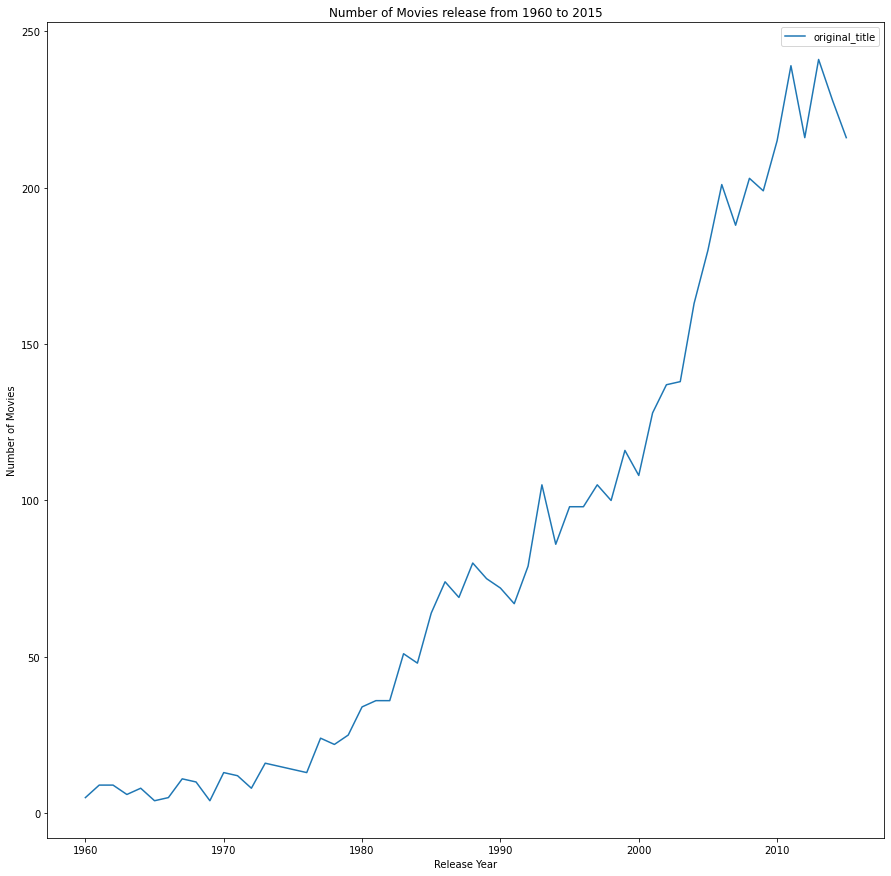

In [23]:
#Plotting number of film produced by year
c_mov_df.groupby('release_year')['original_title'].count().plot(kind='line', figsize=(15,15))
plt.title('Number of Movies release from 1960 to 2015')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend();

### The chart above showed that movies production started to increase in the late 1970s and has continue ever since

In [24]:
#sampling data from 1980
mov_data_80_to_15 = c_mov_df.query('release_year >= 1980')

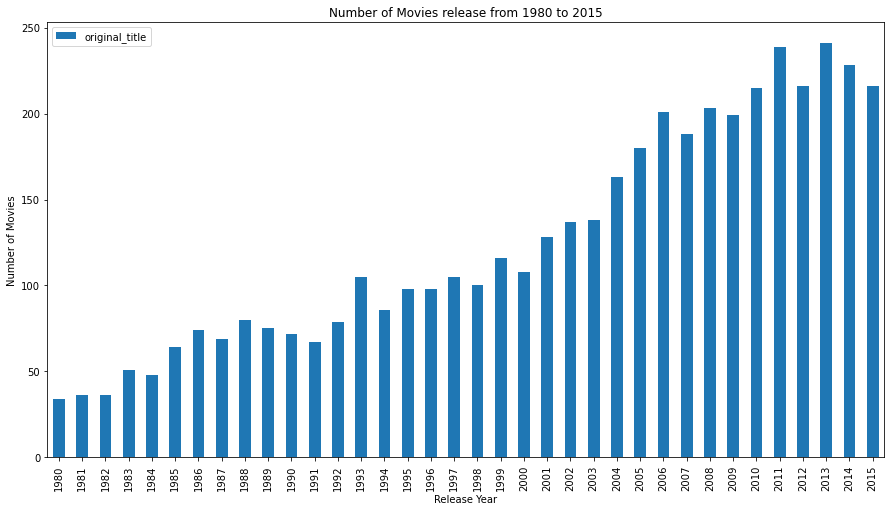

In [25]:
mov_data_80_to_15.groupby('release_year')['original_title'].count().plot(kind='bar', figsize=(15,8))
plt.title('Number of Movies release from 1980 to 2015')
plt.xlabel('Release Year')
plt.ylabel('Number of Movies')
plt.legend();

### The Chart above indicated that though movie production had been on the rise, there is a decline in 2012, production picked up in 2013 and from 2013, production has seen decline in 2014 and 2015

In [26]:
rev = mov_data_80_to_15[['original_title','release_year','revenue', 'vote_count','budget']].max().revenue 
bug = mov_data_80_to_15[['original_title','release_year','revenue', 'vote_count','budget']].max().budget
print(rev-bug)
mov_data_80_to_15[['original_title','release_year','revenue', 'vote_count','budget']].max()

2356505847


original_title    ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰
release_year                       2015
revenue                      2781505847
vote_count                         9767
budget                        425000000
dtype: object

## The highest movie of all time with 9767 votes
- Title - ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰
- \$2,781,505,847 in Revenue
- \$2,356,505,847 in profit


In [27]:
rev = mov_data_80_to_15[['original_title','release_year','revenue', 'vote_count','budget']].min().revenue 
bug = mov_data_80_to_15[['original_title','release_year','revenue', 'vote_count','budget']].min().budget
print(rev-bug)
mov_data_80_to_15[['original_title','release_year','revenue', 'vote_count','budget']].min()

2


original_title     '71
release_year      1980
revenue              2
vote_count          10
budget               0
dtype: object

## The lowest movie of all time with 10 votes
- Title - 71
- \$2 in Revenue
- \$2 in profit

### Research Question 2  Director with most film production

In [28]:
#retrieving the director and title column
dir_list_df = mov_data_80_to_15.loc[:,['director', 'original_title']]

In [29]:
#Counting number of movie produced and sorting in descending order
top_dir = dir_list_df.groupby(['director']).count().sort_values(by='original_title',ascending=False)

In [30]:
top_dir.query('original_title > 10')

,original_title
director,
Steven Spielberg,23
Clint Eastwood,22
Ridley Scott,19
Ron Howard,18
Woody Allen,18
Steven Soderbergh,17
Tony Scott,16
Tim Burton,16
Joel Schumacher,16


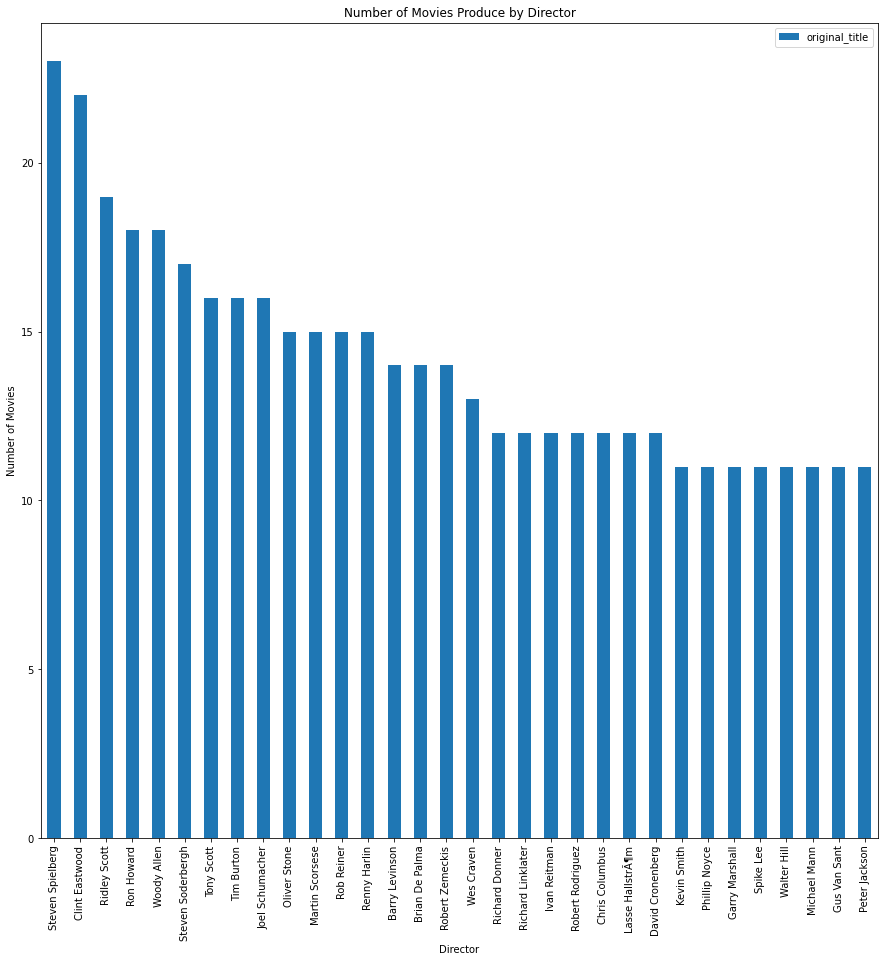

In [31]:
top_dir.query('original_title > 10').plot(kind='bar', figsize=(15,15))
plt.title('Number of Movies Produce by Director')
plt.xlabel('Director')
plt.ylabel('Number of Movies')
plt.legend();

#### from the graph above we can see that Steven Spielberg produced more movies than the rest of the directors

### Research Question 3  Movie with cost savings in excess of \$50,000,000

In [ ]:
#Adding a new column to the dataset for cost_savings
mov_data_80_to_15['cost_savings'] = mov_data_80_to_15['budget_adj'] - mov_data_80_to_15['budget']

In [ ]:
#Sorting the dataset in descending order
mov_with_cs = mov_data_80_to_15[['original_title', 'cost_savings']].sort_values(by='cost_savings', ascending=False)

In [ ]:
#Removing data that have less than $50,000,000 in cost savings
mov_with_pcs = mov_with_cs.query('cost_savings > 50000000')

In [ ]:
mov_with_pcs.head()

In [ ]:
#PLotting the result
plt.figure(figsize=(15,15))

plt.pie(mov_with_pcs.cost_savings, labels=mov_with_pcs.original_title, autopct='%1.1f%%')
plt.title('Movie with Cost savings');

#### Superman II is the movie with the highest cost savings before 2016

<a id='conclusions'></a>
## Conclusions

> #### Result
>
> - The movie industry had seen an upward trend from late 1970, though a decline had set in from 2013, I was unable to determine id the decline continued beyond 2015 because the dataset end in the year 2015.
>
> - The highest movie of all time before 2016 both in revenue and votes is "ã‚¢ãƒƒãƒ—ãƒ«ã‚·ãƒ¼ãƒ‰" while 71 is the lowest.
>
> - Before 2016, Steven Spielberg	had director 23 movies, followed by Clint Eastwood, who had directed 22 movies, the third place goes to Ridley Scoot with 19 movies, while Ron Howard and Woody Allen came fourth with 18 movies
>
> - While comparing the budget with the adjusted budget, the top cost saving movie is Supermann II
>
> #### Limitation
>
> - There are no record from 2016 to date, as such the decline experience in 2014 could not be analyse further
>
> - The dataset did not provided revenue earned by the director for each movie produced
>
> - The dataset did not provided revenue earned by the casts(actors) for the role in the movie


